### 확률적 경사 하강법
- 무작위하게 or 랜덤하게 기술적인 표현
- 경사를 따라 내려가는 방법을 말한다. (조금씩 수십, 수백번 최적점을 찾아서 내려간다.)

### 손실 함수
- 머신러닝 알고리즘이 얼마나 나쁜지를 측정하는 함수
- 단점: 샘플이 많이 없다면, 정확도가 듬성등성 측정이 되어서 경사 하강법을 이용해 조금씩 움직일 수 없음. (경사면은 연속적이여야 함)
- 모델을 최척화 할땐 다른 함수 사용 (로지스틱 손실 함수, 이진 크로스엔트로피 손실 함수)

### 데이터 전처리
- 확률적 경사 하강법은 가파른 경사를 내려가야 하기 때문에 scale이 각각 달라야 한다.
- 경사하강법 알고리즘 사용시, 데이터 전처리 해서 대표적으로 표준점수로 특성의 scale 조절 필요

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### SGDClassifier

In [4]:
from sklearn.linear_model import SGDClassifier

In [5]:
# scikit-learn의 SGDClassifier는 확률적 경사하강법만 지원한다.
# ConvergenceWarning 발생시, max_iter의 값을 늘려주는것이 좋다.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 정확도
print(sc.score(test_scaled, test_target)) # 정확도

0.8151260504201681
0.8


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
# scikit-learn 에서 epoch를 늘려가면, max_iter를 크게 하면 모델이 많이 훈련된 과대 적합으로 갈 수 있다.
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8067226890756303
0.8


### Epoch와 과대/과소적합 & 조기종료
- 규제값이 작아지면 훈련세트 과대적합 & 점수 높아짐, test 점수 내려감
- 규제값이 커지면 훈련, 테스트 점수가 낮아짐 (과소적합)
- epoch도 비슷, 많이 훈련할수록 훈련세트는 잘 맞지만, 테스트 세트 점수가 내려가는 현상 발생
- epoch가 작으면, 과소적합된 훈련, 테스트 세트의 성능이 떨어짐
- 그래서, 중간지점. 테스트 세트의 성능이 떨어지기전, 훈련세트와 유사하게 만나는 절충점을 파악하고 그 지점까지 epoch를 훈련시켜야함 (조기종료, early stopping)이라고 한다.

In [19]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []

classes = np.unique(train_target)

In [20]:
# 300번의 epoch 반복해서 훈련
# partial_fit는 훈련세트의 일부만 주어진다고 가정, 전체 sample의 나올수 있는 class개수 목록를 전달해줘야함
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

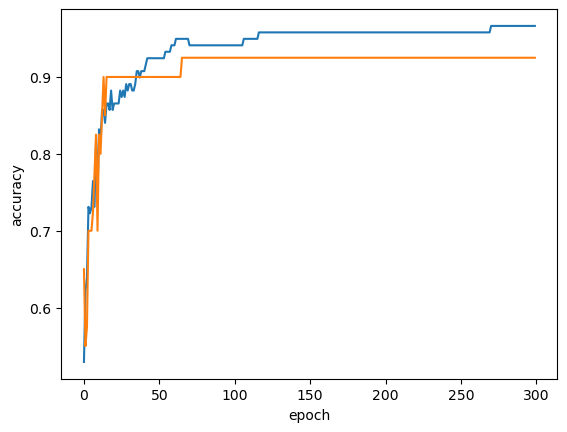

In [22]:
# 그래프를 보면 100정도의 epoch가 절충점이라고 판단.
import matplotlib.pyplot as plt
plt.plot(train_score) # training_score(blue)
plt.plot(test_score) # test_score(yellow)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [23]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # training_set 성능: 96%
print(sc.score(test_scaled, test_target)) # test_set 성능: 93%

0.957983193277311
0.925


### 흰지 손실 (hinge loss)
- support vector machine (또 다른 머신러닝 알고리즘을 위한 손실 함수)

In [25]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # training_set 성능: 96%
print(sc.score(test_scaled, test_target)) # test_set 성능: 93%

0.9495798319327731
0.925
